# Iniciando tratamento de dados - Arquivo aberto disponibilizado pelo BACEN: https://www.bcb.gov.br/fis/Consorcios/port/consorcio_banco_de_dados.asp?frame=1

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# arquivo com informações de consorcio de imoveis e grupos de todas as administradoras de consorcio
url = "C:/Users/joth1/Documents/miniprojeto_pandas_sql/Nova pasta/202310Consorcios/202310Bens_Imoveis_Grupos.csv"

# Tente ler o arquivo usando utf-8 e, se falhar, tente latin-1
try:
    df = pd.read_csv(url, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding='latin-1', sep=';')

display(df)


,#Nome_da_Administradora,CNPJ_da_Administradora,Data_base,Código_do_grupo,Código_do_segmento,Número_da_assembléia_geral_ordinária,Valor_médio_do_bem,Índice_de_correção,Taxa_de_administração,Prazo_do_grupo_em_meses,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_não_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mês,Quantidade_de_cotas_excluídas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização
0,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00040,1,180,"272255,31",3,"18,65135",180,373,73,0,0,1721,431,15
1,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00041,1,180,"288848,90",3,"17,21443",180,422,84,0,0,1869,493,10
2,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00043,1,180,"269396,83",3,"18,29910",180,381,62,0,0,1795,433,10
3,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00044,1,180,"288651,90",3,"18,35775",180,385,86,0,0,1827,456,11
4,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00045,1,180,"258187,40",3,"18,75243",180,335,77,0,0,1776,393,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10062,1,5,"153125,00",3,"16,98270",200,529,0,49,2,166,0,8
2126,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10063,1,3,"87582,78",3,"20,00000",200,489,0,107,1,101,0,7
2127,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10064,1,2,"84259,87",3,"20,00000",200,600,0,0,4,45,0,5
2128,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10902,1,89,"183306,93",99,"12,00000",180,345,5,0,1,258,69,66


In [3]:
df2 = df.groupby('#Nome_da_Administradora').agg(qtd_nomes=('#Nome_da_Administradora', 'size')).reset_index()

df2 = df2.sort_values(ascending=False, by='qtd_nomes')

display(df2)

,#Nome_da_Administradora,qtd_nomes
11,BRADESCO CONS. LTDA. ...,385
44,PORTO SEGURO ADM. CONS. LTDA ...,269
38,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251
37,HS ADM CONS LTDA ...,111
27,EMBRACON ADM CONS LTDA ...,107
...,...,...
50,REDE OESTE ADM DE CONS LTDA ...,1
29,FINAMA ADM CONS LTDA ...,1
18,COMAUTO ADM CONS LTDA. ...,1
57,SIMPALA ADM CONSÓRCIOS LTDA. ...,1


In [4]:
empresas = df2['#Nome_da_Administradora'].str.strip().head(5).tolist()
display(empresas)

['BRADESCO CONS. LTDA.',
 'PORTO SEGURO ADM. CONS. LTDA',
 'ITAÚ ADM DE CONSÓRCIOS LTDA',
 'HS ADM CONS LTDA',
 'EMBRACON ADM CONS LTDA']

In [5]:
df3 = df.copy()
df3 = df3[df3['#Nome_da_Administradora'].str.strip().astype(str).isin(empresas)]
display(df3)

,#Nome_da_Administradora,CNPJ_da_Administradora,Data_base,Código_do_grupo,Código_do_segmento,Número_da_assembléia_geral_ordinária,Valor_médio_do_bem,Índice_de_correção,Taxa_de_administração,Prazo_do_grupo_em_meses,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_não_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mês,Quantidade_de_cotas_excluídas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização
0,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00040,1,180,"272255,31",3,"18,65135",180,373,73,0,0,1721,431,15
1,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00041,1,180,"288848,90",3,"17,21443",180,422,84,0,0,1869,493,10
2,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00043,1,180,"269396,83",3,"18,29910",180,381,62,0,0,1795,433,10
3,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00044,1,180,"288651,90",3,"18,35775",180,385,86,0,0,1827,456,11
4,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00045,1,180,"258187,40",3,"18,75243",180,335,77,0,0,1776,393,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,HS ADM CONS LTDA ...,73516106,202310,1132,1,3,"137388,40",3,"22,00000",180,1773,0,175,5,5,0,11
1919,HS ADM CONS LTDA ...,73516106,202310,1133,1,2,"92379,76",3,"22,00000",180,1996,0,0,4,1,0,10
1920,HS ADM CONS LTDA ...,73516106,202310,1134,1,1,"294105,79",3,"22,00000",200,1587,0,0,3,1,0,3
1921,HS ADM CONS LTDA ...,73516106,202310,1135,1,1,"786539,72",3,"22,00000",220,1520,0,0,2,3,0,2


In [6]:
df4 = df3.groupby('#Nome_da_Administradora').agg(qtd=('#Nome_da_Administradora', 'size'),
                                                                   qtd_cotas_excluidas=('Quantidade_de_cotas_excluídas', 'sum')
                                                                   ,qtd_cotas_ativas=('Quantidade_de_cotas_ativas_em_dia', 'sum')
                                                                   ,NPL=('Quantidade_de_cotas_ativas_contempladas_inadimplentes', 'sum')
                                                                   ,NPL_NAO_CONT=('Quantidade_de_cotas_ativas_não_contempladas_inadimplentes', 'sum')
                                                                   ,qtd_cotas_nao_utilizadas=('Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização', 'sum')).reset_index()

df4 = df4.sort_values(by='qtd', ascending=False)


df4['NPL_CALC'] = (df4['NPL'] / df4['qtd_cotas_ativas']) * 100
df4['NPL_CALC_NCONT'] = (df4['NPL_NAO_CONT'] / df4['qtd_cotas_ativas']) * 100


display(df4)

,#Nome_da_Administradora,qtd,qtd_cotas_excluidas,qtd_cotas_ativas,NPL,NPL_NAO_CONT,qtd_cotas_nao_utilizadas,NPL_CALC,NPL_CALC_NCONT
0,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922
4,PORTO SEGURO ADM. CONS. LTDA ...,269,133354,154120,3706,10195,14639,2.404620,6.614975
3,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998
2,HS ADM CONS LTDA ...,111,124869,126124,1960,8665,7230,1.554026,6.870223
1,EMBRACON ADM CONS LTDA ...,107,220350,72524,2788,4273,8194,3.844245,5.891843


# Empresas que mais aparecem 

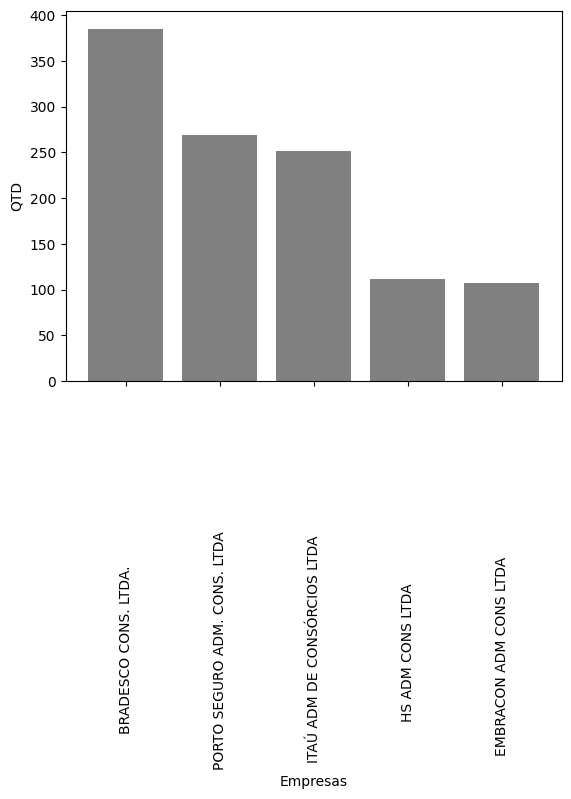

In [7]:
df4 = df4.head(5)

grafico_barras = plt.bar(df4['#Nome_da_Administradora'], df4['qtd'], color='gray')
plt.xlabel('Empresas')
plt.ylabel('QTD')

plt.xticks(rotation=90, fontsize=10)

plt.show()

# Empresa com mais inadimplentes sem contemplação das 5 primeiras

([<matplotlib.patches.Wedge at 0x22c4c903890>,
 [Text(0.6996901994181574, 0.8487836148502039, 'BRADESCO CONS. LTDA.                                        '),
  Text(-0.7683911707930979, 0.7871308713595296, 'PORTO SEGURO ADM. CONS. LTDA                                '),
  Text(-0.8982268641568711, -0.7957314248582331, 'ITAÚ ADM DE CONSÓRCIOS LTDA                                 '),
  Text(0.611384729277798, -0.9144444831732071, 'HS ADM CONS LTDA                                            '),
  Text(1.0675049542861221, -0.2653924877885292, 'EMBRACON ADM CONS LTDA                                      ')],
 [Text(0.3816491996826312, 0.4629728808273839, '28.1%'),
  Text(-0.41912245679623517, 0.4293441116506525, '18.5%'),
  Text(-0.5239656707581748, -0.464176664500636, '30.0%'),
  Text(0.3334825796060716, -0.4987878999126584, '15.7%'),
  Text(0.582275429610612, -0.14475953879374318, '7.8%')])

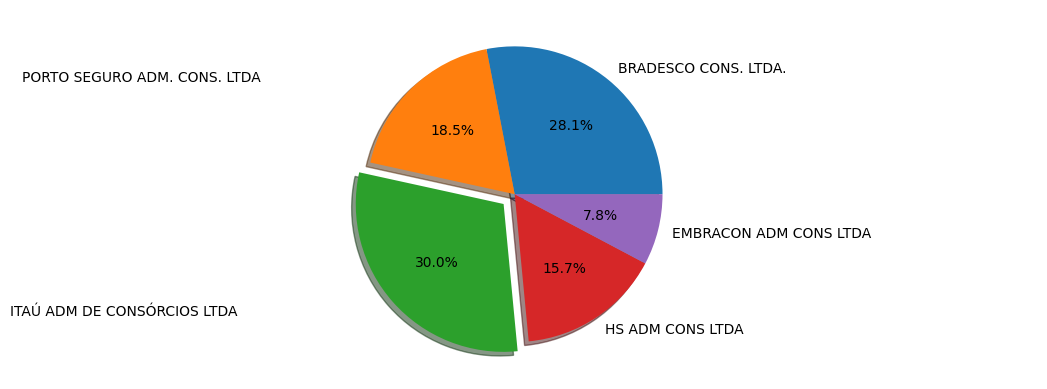

In [8]:
five = (0,0,0.1,0,0)
plt.pie(df4['NPL_NAO_CONT'], labels=df4['#Nome_da_Administradora'], shadow=True, autopct='%1.1f%%', explode=five)

In [9]:
url_uf = r"C:\Users\joth1\Documents\miniprojeto_pandas_sql\Nova pasta\202309Consorcios_UF.csv"
url_uf = url_uf.replace('\\', '/')

try:
    df_uf = pd.read_csv(url_uf, encoding='utf-8', sep=';')
except:
    df_uf = pd.read_csv(url_uf, encoding='latin-1', sep=';')


df_uf2 = df_uf.groupby(['Nome_da_Administradora', 'Unidade_da_Federação_do_consorciado']).agg(qtd_apareceu_estado=('Nome_da_Administradora', 'size')
                                             ,qtd_ativos_nao_contemplad=('Quantidade_de_consorciados_ativos_não_contemplados', 'sum')
                                            ,qtd_adesao=('Quantidade_de_adesões_no_trimestre', 'sum')).reset_index()

df_uf2 = df_uf2.sort_values(by='qtd_ativos_nao_contemplad', ascending=False)

empresas2 = df_uf2['Nome_da_Administradora'].str.strip().head(5).to_list()

df_uf2 = df_uf2[df_uf2['Nome_da_Administradora'].str.strip().isin(empresas2)]



df_uf2 = df_uf2.rename(columns={'Nome_da_Administradora': 'nm_empresa'})

display(df_uf2)




,nm_empresa,Unidade_da_Federação_do_consorciado,qtd_apareceu_estado,qtd_ativos_nao_contemplad,qtd_adesao
355,BRADESCO CONS. LTDA. ...,SP,4,278125,50067
301,BB CONSÓRCIOS ...,SP,6,223611,33883
1397,ITAÚ ADM DE CONSÓRCIOS LTDA ...,SP,4,119911,21329
42,ADM CONS NAC HONDA LTDA ...,BA,2,100776,29618
1657,PORTO SEGURO ADM. CONS. LTDA ...,SP,4,99706,26222
...,...,...,...,...,...
1396,ITAÚ ADM DE CONSÓRCIOS LTDA ...,SE,4,492,153
1372,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,4,347,91
1653,PORTO SEGURO ADM. CONS. LTDA ...,RR,3,135,64
1632,PORTO SEGURO ADM. CONS. LTDA ...,AC,3,111,40


# Merge com dados do consorcio de 09/2023 sobre estados

In [10]:
display(df4.columns)
display(df_uf2.columns)

Index(['#Nome_da_Administradora', 'qtd', 'qtd_cotas_excluidas',
       'qtd_cotas_ativas', 'NPL', 'NPL_NAO_CONT', 'qtd_cotas_nao_utilizadas',
       'NPL_CALC', 'NPL_CALC_NCONT'],
      dtype='object')

Index(['nm_empresa', 'Unidade_da_Federação_do_consorciado',
       'qtd_apareceu_estado', 'qtd_ativos_nao_contemplad', 'qtd_adesao'],
      dtype='object')

In [11]:
colunas_desejadas = ['Unidade_da_Federação_do_consorciado', 'qtd_apareceu_estado', 'qtd_ativos_nao_contemplad', 'qtd_adesao', 'nm_empresa']

df5 = pd.merge(df4, df_uf2[colunas_desejadas], 
                               left_on='#Nome_da_Administradora', right_on='nm_empresa', how='left')

display(df5)

,#Nome_da_Administradora,qtd,qtd_cotas_excluidas,qtd_cotas_ativas,NPL,NPL_NAO_CONT,qtd_cotas_nao_utilizadas,NPL_CALC,NPL_CALC_NCONT,Unidade_da_Federação_do_consorciado,qtd_apareceu_estado,qtd_ativos_nao_contemplad,qtd_adesao,nm_empresa
0,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,SP,4.0,278125.0,50067.0,BRADESCO CONS. LTDA. ...
1,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,MG,4.0,50708.0,10913.0,BRADESCO CONS. LTDA. ...
2,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,RJ,4.0,43867.0,6311.0,BRADESCO CONS. LTDA. ...
3,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,PR,4.0,43075.0,7012.0,BRADESCO CONS. LTDA. ...
4,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,BA,4.0,42776.0,7020.0,BRADESCO CONS. LTDA. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998,RR,4.0,504.0,77.0,ITAÚ ADM DE CONSÓRCIOS LTDA ...
79,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998,SE,4.0,492.0,153.0,ITAÚ ADM DE CONSÓRCIOS LTDA ...
80,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998,AC,4.0,347.0,91.0,ITAÚ ADM DE CONSÓRCIOS LTDA ...
81,HS ADM CONS LTDA ...,111,124869,126124,1960,8665,7230,1.554026,6.870223,NaN,NaN,NaN,NaN,NaN


In [12]:
empresa_nome_analitico = df5[['#Nome_da_Administradora', 'Unidade_da_Federação_do_consorciado']]

empresa_nome_analitico['Unidade_da_Federação_do_consorciado'] = empresa_nome_analitico['Unidade_da_Federação_do_consorciado'].fillna('Nao filtrado')
display(empresa_nome_analitico)

C:\Users\joth1\AppData\Local\Temp\ipykernel_33364\1729596173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa_nome_analitico['Unidade_da_Federação_do_consorciado'] = empresa_nome_analitico['Unidade_da_Federação_do_consorciado'].fillna('Nao filtrado')


,#Nome_da_Administradora,Unidade_da_Federação_do_consorciado
0,BRADESCO CONS. LTDA. ...,SP
1,BRADESCO CONS. LTDA. ...,MG
2,BRADESCO CONS. LTDA. ...,RJ
3,BRADESCO CONS. LTDA. ...,PR
4,BRADESCO CONS. LTDA. ...,BA
...,...,...
78,ITAÚ ADM DE CONSÓRCIOS LTDA ...,RR
79,ITAÚ ADM DE CONSÓRCIOS LTDA ...,SE
80,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC
81,HS ADM CONS LTDA ...,Nao filtrado


In [13]:
import datetime 

agora = datetime.datetime.now()
formato_dia_hora = agora.strftime("%d/%m/%Y %H:%M:%S")

caminho = 'analitico_bacen.xlsx'

df5.to_excel(caminho, sheet_name='Fonte_dados', index=False)
display('executado: ', formato_dia_hora)

'executado: '

'08/01/2024 18:34:56'

In [19]:
brad = df5.loc[df5['qtd'] == 385]
display(brad)

,#Nome_da_Administradora,qtd,qtd_cotas_excluidas,qtd_cotas_ativas,NPL,NPL_NAO_CONT,qtd_cotas_nao_utilizadas,NPL_CALC,NPL_CALC_NCONT,Unidade_da_Federação_do_consorciado,qtd_apareceu_estado,qtd_ativos_nao_contemplad,qtd_adesao,nm_empresa
0,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,SP,4.0,278125.0,50067.0,BRADESCO CONS. LTDA. ...
1,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,MG,4.0,50708.0,10913.0,BRADESCO CONS. LTDA. ...
2,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,RJ,4.0,43867.0,6311.0,BRADESCO CONS. LTDA. ...
3,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,PR,4.0,43075.0,7012.0,BRADESCO CONS. LTDA. ...
4,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,BA,4.0,42776.0,7020.0,BRADESCO CONS. LTDA. ...
5,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,RS,4.0,29434.0,5482.0,BRADESCO CONS. LTDA. ...
6,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,SC,4.0,29373.0,6192.0,BRADESCO CONS. LTDA. ...
7,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,GO,4.0,25404.0,4734.0,BRADESCO CONS. LTDA. ...
8,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,PA,4.0,20167.0,3187.0,BRADESCO CONS. LTDA. ...
9,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922,PE,4.0,18191.0,2854.0,BRADESCO CONS. LTDA. ...
